### IMPORTS

In [81]:
import sys
import os
sys.executable

'c:\\Users\\luisb\\AppData\\Local\\Programs\\Python\\Python312\\python.exe'

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [83]:
SAVE_PATH = "../saves/"

In [84]:
def get_pareto(arr):
    # Convert the array to a numpy array
    arr_np = np.array(arr)

    # Initialize a boolean mask to keep track of pareto-efficient elements
    is_pareto_efficient = np.ones(arr_np.shape[0], dtype=bool)

    for i in range(arr_np.shape[0]):
        if is_pareto_efficient[i]:
            for j in range(arr_np.shape[0]):
                if j != i and is_pareto_efficient[j]:
                    # Check if arr[i] dominates arr[j] in all dimensions
                    if np.all(arr_np[i] <= arr_np[j]) and np.any(arr_np[i] < arr_np[j]):
                        is_pareto_efficient[j] = False

    # Return the pareto-efficient elements
    return is_pareto_efficient
    

In [85]:
savefiles = [file for file in os.listdir(SAVE_PATH)] 
savefiles

['pareto.csv',
 'saves_1710502540563.csv',
 'saves_1710502616293.csv',
 'saves_1710502702203.csv',
 'saves_1710502795933.csv',
 'saves_1710513923401.csv',
 'saves_1710514182799.csv',
 'saves_1710514219897.csv',
 'saves_1710514418808.csv',
 'saves_1710514601277.csv',
 'saves_1710514689193.csv',
 'saves_1710514832352.csv',
 'saves_1710515003559.csv']

### VISUALIZATION

In [86]:
pareto = pd.read_csv(SAVE_PATH+'pareto.csv', sep=';')
pareto

,utilA,utilB,utilSum,contract,pareto
0,1959,7250,9209,"[34,118,129,162,19,87,121,178,111,132,130,84,7...",True
1,1957,7259,9216,"[34,118,129,162,19,87,121,178,127,132,130,84,7...",True
2,1956,7260,9216,"[34,118,129,162,19,87,121,178,127,132,130,84,7...",True
3,1953,7269,9222,"[34,118,129,162,22,87,121,178,127,132,130,84,7...",True
4,1946,7276,9222,"[34,118,129,162,19,87,121,178,127,132,130,84,7...",True
...,...,...,...,...,...
269,9363,6527,15890,"[73,174,23,75,149,11,59,57,132,152,163,86,151,...",True
270,9380,6521,15901,"[73,174,23,136,149,11,59,57,132,75,163,86,151,...",True
271,9431,6520,15951,"[50,174,23,136,149,11,59,57,132,75,163,86,151,...",True
272,9472,6519,15991,"[73,174,23,136,149,11,59,57,132,152,163,86,151...",True


In [87]:
for savefile in savefiles:
    contracts = pd.read_csv(SAVE_PATH + savefile, sep=';')
    if "pareto" not in contracts.columns:
        contracts["pareto"] = get_pareto(contracts[["utilA","utilB"]])
        contracts = contracts.sort_values(by="utilSum", ascending=False).drop_duplicates()
        contracts.to_csv(SAVE_PATH+savefile, sep=';', index=False)
    if "index" in contracts.columns:
        contracts = contracts.drop(columns=["index"])
        contracts.to_csv(SAVE_PATH+savefile, sep=';', index=False)
        print(savefile, "saved without index")
    pareto = pd.concat([pareto, contracts[contracts["pareto"]]])
pareto = pareto.sort_values(by="utilSum", ascending=False).drop_duplicates()
pareto["pareto"] = get_pareto(pareto[["utilA","utilB"]])
pareto = pareto[pareto["pareto"]].sort_values(by="utilSum", ascending=True)
pareto = pareto.drop_duplicates()

pareto.to_csv(SAVE_PATH+'pareto.csv', sep=';', index=False)
pareto

,utilA,utilB,utilSum,contract,pareto
0,1959,7250,9209,"[34,118,129,162,19,87,121,178,111,132,130,84,7...",True
14,1956,7260,9216,"[34,118,129,162,19,87,121,178,127,132,130,84,7...",True
1,1957,7259,9216,"[34,118,129,162,19,87,121,178,127,132,130,84,7...",True
3,1953,7269,9222,"[34,118,129,162,22,87,121,178,127,132,130,84,7...",True
4,1946,7276,9222,"[34,118,129,162,19,87,121,178,127,132,130,84,7...",True
...,...,...,...,...,...
269,9363,6527,15890,"[73,174,23,75,149,11,59,57,132,152,163,86,151,...",True
3,9380,6521,15901,"[73,174,23,136,149,11,59,57,132,75,163,86,151,...",True
271,9431,6520,15951,"[50,174,23,136,149,11,59,57,132,75,163,86,151,...",True
1,9472,6519,15991,"[73,174,23,136,149,11,59,57,132,152,163,86,151...",True


(982.3, 9929.7, 6383.85, 9335.15)

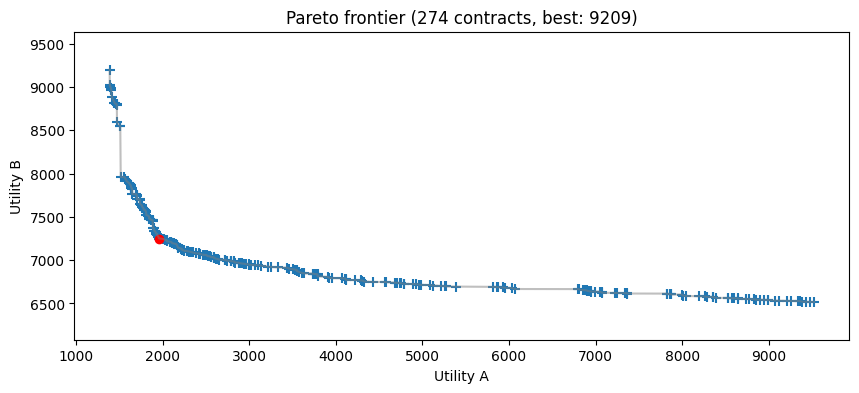

In [88]:
pareto = pareto.sort_values(by="utilA", ascending=True)
best_util = pareto[pareto["utilSum"] == pareto["utilSum"].min()]
plt.figure(figsize=(10,4))
plt.title(f"Pareto frontier ({len(pareto)} contracts, best: {pareto["utilSum"].min()})")
plt.plot(pareto["utilA"], pareto["utilB"], color='gray', linestyle='-', alpha=0.5)
plt.scatter(pareto["utilA"], pareto["utilB"], s=50, marker="+")
plt.scatter(best_util["utilA"], best_util["utilB"], marker="o", color="red")
plt.xlabel("Utility A")
plt.ylabel("Utility B")
plt.axis("equal")